<a href="https://colab.research.google.com/github/kimbaorrr/data_science/blob/main/cyber_security_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Nạp dữ liệu từ CSV
csv_data = '/content/drive/MyDrive/TF_Training/datasets/data_science/cyber_security_attacks.csv'
df = pd.read_csv(csv_data, delimiter=',')
df.sample(50)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
20711,2021-12-17 09:11:44,164.246.212.45,49.195.36.147,30441,42201,ICMP,920,Data,HTTP,Ratione cum fugiat. Dolor iste eaque nostrum l...,...,Blocked,Low,Divyansh Kota,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,Segment A,"Jammu, Bihar",166.16.246.10,NaN,NaN,Firewall
24640,2021-07-18 17:47:06,169.168.123.94,116.160.69.28,16292,26360,TCP,260,Data,DNS,Facilis rem optio debitis ad. Similique eum ev...,...,Ignored,Low,Azad Tara,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,Segment B,"Shimoga, Madhya Pradesh",105.138.150.24,Log Data,Alert Data,Server
13293,2023-06-25 13:49:26,30.33.170.7,143.221.89.160,49869,60035,ICMP,1238,Control,DNS,Repudiandae sunt porro sit dolor nulla. Illo i...,...,Blocked,Low,Armaan Kurian,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_8_1 rv...,Segment C,"Sonipat, Madhya Pradesh",96.204.31.186,Log Data,Alert Data,Firewall
16675,2021-04-29 03:30:13,163.235.217.236,97.33.228.206,30059,64607,ICMP,289,Data,DNS,Eum voluptas officiis consequuntur distinctio....,...,Blocked,Medium,Sara Chada,Mozilla/5.0 (Android 2.2.2; Mobile; rv:66.0) G...,Segment A,"Uluberia, Sikkim",NaN,NaN,Alert Data,Server
22752,2022-10-10 05:47:11,190.226.200.246,95.53.197.7,39765,33589,TCP,462,Data,DNS,Iure dolorem voluptatem delectus iure laborum....,...,Ignored,Low,Mamooty Shere,Mozilla/5.0 (Windows NT 4.0) AppleWebKit/533.2...,Segment C,"Rajahmundry, Bihar",NaN,NaN,Alert Data,Server
39941,2020-03-31 05:27:55,58.84.216.186,124.0.176.171,19989,10660,UDP,1382,Control,FTP,Sequi nostrum natus vero vero ab. Sequi non nu...,...,Ignored,Medium,Zoya Kulkarni,Opera/8.67.(Windows 95; ti-ER) Presto/2.9.161 ...,Segment C,"Thane, Mizoram",NaN,Log Data,Alert Data,Firewall
6859,2022-10-16 15:03:06,97.146.213.4,35.204.106.193,18554,5015,UDP,292,Data,HTTP,Nulla magni provident distinctio fuga. Laborio...,...,Blocked,High,Nehmat Kari,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_12_5; ...,Segment C,"Gurgaon, Maharashtra",170.127.247.182,Log Data,Alert Data,Server
24616,2023-04-25 18:10:34,171.159.78.161,38.174.242.84,60277,21123,ICMP,807,Control,HTTP,Provident quidem illum qui neque. Expedita arc...,...,Ignored,High,Jhanvi Chauhan,Mozilla/5.0 (Windows 98; Win 9x 4.90; ca-IT; r...,Segment C,"Kumbakonam, Telangana",NaN,NaN,Alert Data,Firewall
11413,2021-09-15 14:01:14,182.161.49.1,58.134.88.68,27791,27901,UDP,430,Control,DNS,Corporis officiis eligendi aut quo suscipit. E...,...,Logged,Low,Bhavin Gaba,Opera/8.71.(Windows NT 5.01; cmn-TW) Presto/2....,Segment A,"Sangli-Miraj & Kupwad, Rajasthan",NaN,Log Data,NaN,Firewall
34332,2021-01-13 06:55:04,107.228.2.143,46.10.241.0,47186,9209,ICMP,454,Control,HTTP,A fugiat sunt quia minus reiciendis consequunt...,...,Ignored,Low,Advik Rout,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,Segment C,"Bhilwara, Rajasthan",181.121.99.200,NaN,NaN,Server


In [ ]:
# List các thuộc tính của dữ liệu
df.columns


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
# Kiểm tra thông tin thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
# Kiểm tra phần tử ngoại lai
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [ ]:
print('Top 5 IP nguồn tấn công cao nhất')
print(df['Source IP Address'].value_counts(normalize=True, ascending=False).mul(100).round(5).head(5).astype(str) + '%')

print('Top 5 IP đích bị tấn công nhiều nhất')
print(df['Destination IP Address'].value_counts(normalize=True, ascending=False).mul(100).round(5).head(5).astype(str) + '%')

Top 5 IP nguồn tấn công cao nhất
103.216.15.12      0.0025%
74.225.47.66       0.0025%
147.178.224.232    0.0025%
119.183.250.156    0.0025%
80.60.140.131      0.0025%
Name: Source IP Address, dtype: object
Top 5 IP đích bị tấn công nhiều nhất
84.9.164.252       0.0025%
131.248.231.186    0.0025%
48.157.39.218      0.0025%
112.135.140.167    0.0025%
125.252.191.10     0.0025%
Name: Destination IP Address, dtype: object


In [ ]:
# Hàm random màu Hex
def random_hex_color(n):
  return ['#'+''.join(random.sample('0123456789ABCDEF', 6)) for i in range(n)]

ICMP    33.57%
UDP     33.25%
TCP     33.18%
Name: Protocol, dtype: object
['#B27561', '#A8B537', '#346589']


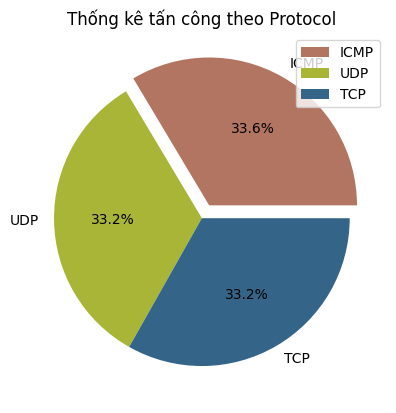

In [ ]:
print(df['Protocol'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

labels = df['Protocol'].unique()
p_count = df['Protocol'].value_counts()
colors = random_hex_color(3)
print(colors)
explode = (0.1, 0, 0)

plt.title('Thống kê tấn công theo Protocol')
plt.pie(x=p_count, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.legend()
plt.show()


DNS     33.44%
HTTP     33.4%
FTP     33.16%
Name: Traffic Type, dtype: object


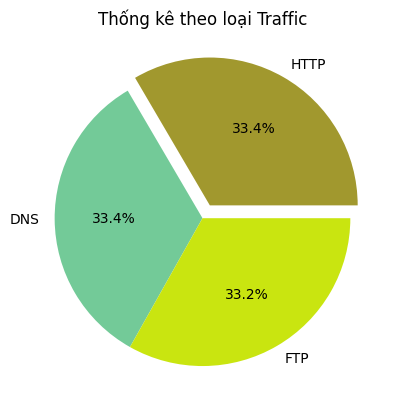

In [ ]:
print(df['Traffic Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

labels = df['Traffic Type'].unique()
p_count = df['Traffic Type'].value_counts()
colors = random_hex_color(len(labels))
explode = (.1, 0, 0)

plt.title('Thống kê theo loại Traffic')
plt.pie(x=p_count, labels=labels, colors=colors, explode=explode, autopct='%1.01f%%')
plt.show()


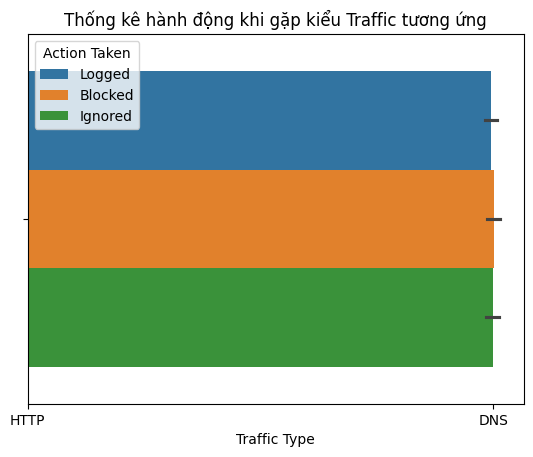

In [ ]:
plt.title('Thống kê hành động khi gặp kiểu Traffic tương ứng')
sns.barplot(df, x='Traffic Type', hue='Action Taken')
plt.show()


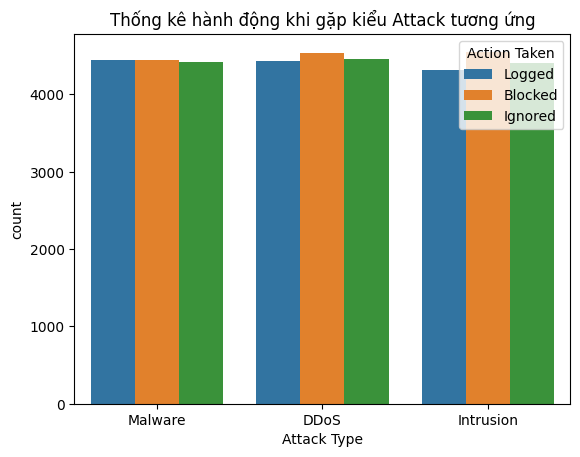

In [ ]:
plt.title('Thống kê hành động khi gặp kiểu Attack tương ứng')
sns.countplot(df, x='Attack Type', hue='Action Taken')
plt.show()

DDoS         33.57%
Malware      33.27%
Intrusion    33.16%
Name: Attack Type, dtype: object


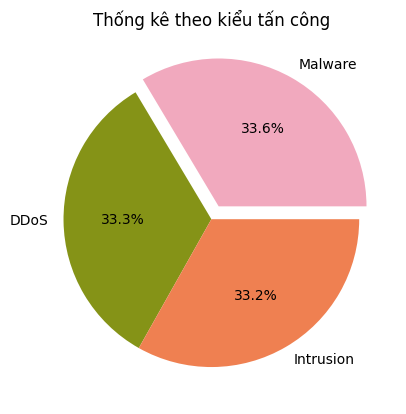

In [ ]:
print(df['Attack Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

labels = df['Attack Type'].unique()
p_count = df['Attack Type'].value_counts()
colors = random_hex_color(len(labels))
explode = (0.1, 0, 0) # Cắt miếng bánh to nhất

plt.title('Thống kê theo kiểu tấn công')
plt.pie(x=p_count, labels=labels, colors=colors, autopct='%1.01f%%', explode=explode)
plt.show()


Liệt kê các từ xuất hiện nhiều nhất trong Payload Data


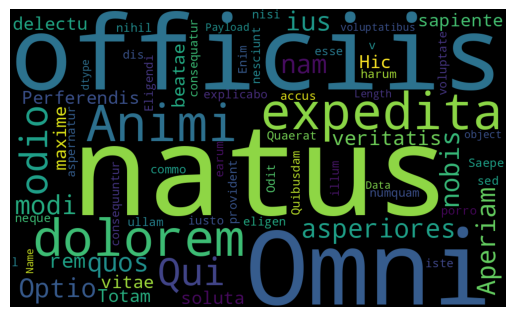

In [ ]:
print('Liệt kê các từ xuất hiện nhiều nhất trong Payload Data')
wc = WordCloud(width=1000, height=600).generate(text=str(df['Payload Data']))
plt.imshow(wc)
plt.grid(False)
plt.axis(False)
plt.show()
